### Libraries

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt
%matplotlib inline

### Importing the data

In [2]:
df_test = pd.read_csv('./test.csv')
df_train = pd.read_csv('./train.csv')

In [3]:
df_test.shape

(1459, 80)

# Response variable - SalePrice
- Rigth / positive skewness
- The response variable is NOT normal distributed, which means that we're violating our assumption in respect no normality

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64
Axes(0.125,0.125;0.775x0.755)


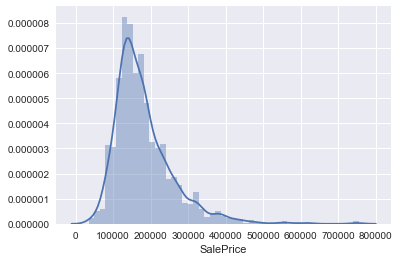

In [4]:
print(df_train['SalePrice'].describe())
#Histogram
import seaborn as sns
print(sns.distplot(df_train['SalePrice']))

#### Checking how much SalePrice deviate from a normal distribution
- Since it's very likely that I'm going to perform regressions (linear models), my depedent variables need to be "somewhat" normal distributed

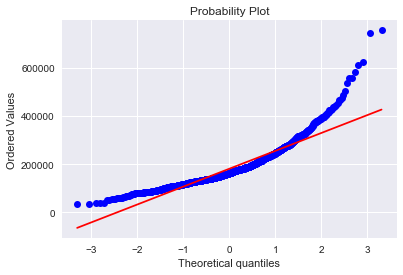

In [5]:
nf = stats.probplot(df_train['SalePrice'], plot=plt)

### Transform Response Variable - SalePrice
- Log Transform SalePrice
- Reason?

#### Log transformation

In [6]:
df_train['SalePrice'] = np.log(df_train['SalePrice'])

#### Checking the transformed response variable

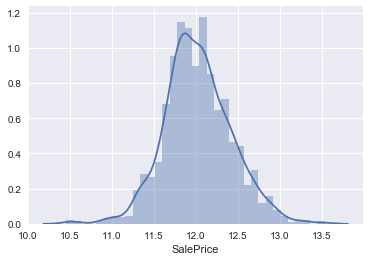

In [7]:
sns.distplot(df_train['SalePrice'])

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 10.46024211,  10.47194981,  10.54270639, ...,  13.34550693,
          13.5211395 ,  13.53447303])),
 (0.39826223081618872, 12.024050901109383, 0.99537614756366133))

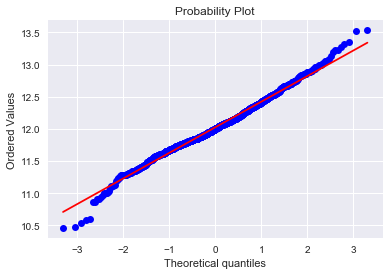

In [8]:
stats.probplot(df_train['SalePrice'], plot=plt)

# EDA
- Merging train and validate
- Impute missing values (Handling missing data)
- Categorical versus Numeric

- df.all.describe(): shows a summary of the numerical attributes

### Merging Train and Validate

In [9]:
#Obs remember to exclude response variable, SalePrice
frames = [df_train, df_test]
df_all = pd.concat(frames)

df_all.shape

(2919, 81)

### Missing values - Overview

In [10]:
#axis=0, summing each row for each column
#isnull = return an boolean depending on missing or not

#Calculat the ratio of missing values
missing = (df_all.isnull().sum(axis=0) / len(df_all)*100).sort_values(ascending=False)

#Dropping all 
missing = missing.drop(missing[missing==0].index)

missing_data = pd.DataFrame({'Missing Ratio' :missing})
missing_data


,Missing Ratio
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
SalePrice,49.982871
FireplaceQu,48.646797
LotFrontage,16.649538
GarageFinish,5.447071
GarageCond,5.447071
GarageQual,5.447071


### Updated missing value table

In [11]:
#axis=0, summing each row for each column
#isnull = return an boolean depending on missing or not

#Calculat the ratio of missing values
missing1 = (df_all.isnull().sum(axis=0) / len(df_all)*100).sort_values(ascending=False)

#Dropping all 
missing1 = missing1.drop(missing1[missing1==0].index)

missing_data_updated = pd.DataFrame({'Missing Ratio' :missing1})
missing_data_updated

,Missing Ratio
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
SalePrice,49.982871
FireplaceQu,48.646797
LotFrontage,16.649538
GarageFinish,5.447071
GarageCond,5.447071
GarageQual,5.447071


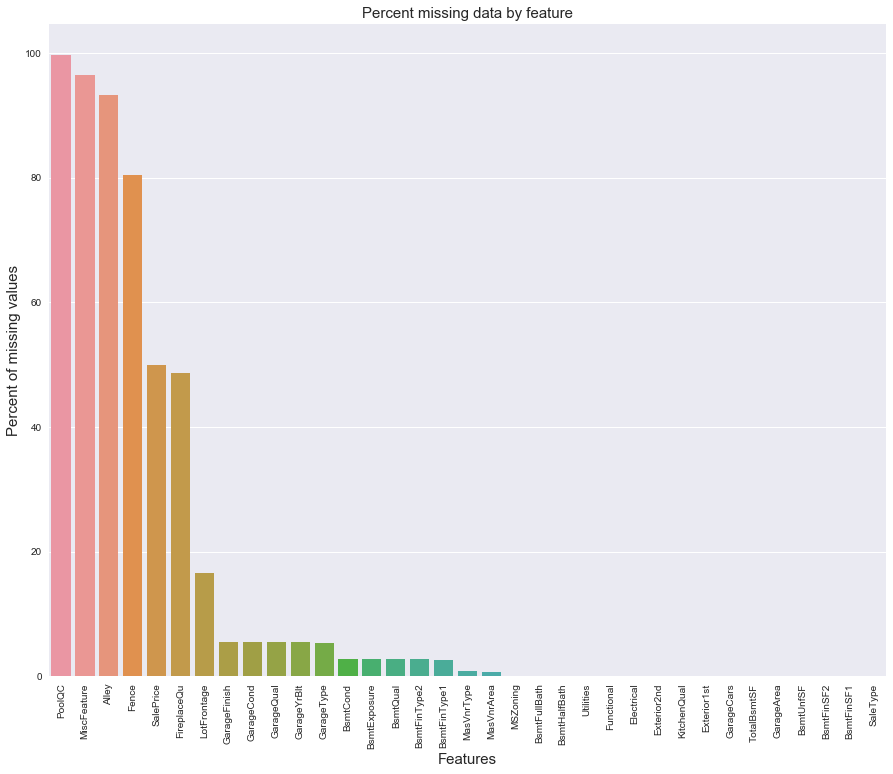

In [12]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=missing.index, y=missing)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

# Handling missing values


## PoolQC, MiscFeature, Alley, Fence, FireplaceQu, 3SsnPorch binary
- I perceive these features as being "somewhat" important, and these can indeed help explain the variation in my predictor SalePrice. The risk of converting these four variables into 1 and 0 is that I lose potential infromation in the levels.
- Consider to go back and keep the levels!

In [13]:
#Replace all NA with None
List_ = ['PoolQC', 'MiscFeature', 'Alley', 'Fence']
df_all[List_] = df_all[List_].fillna('None')

#Function to convert none = 0, and all other categories = 1
def replace(x):
    if x == 'None':
        return 0
    if x != 'None':
        return 1
   
 
df_all['PoolQC'] = df_all['PoolQC'].apply(replace)
df_all['MiscFeature'] = df_all['MiscFeature'].apply(replace)
df_all['Alley'] = df_all['Alley'].apply(replace)
df_all['Fence'] = df_all['Fence'].apply(replace)
df_all['3SsnPorch'] = df_all['3SsnPorch'].apply(replace)


print(df_all['PoolQC'].value_counts())
print(df_all['Alley'].value_counts())
print(df_all['Fence'].value_counts())
print(df_all['MiscFeature'].value_counts())

0    2909
1      10
Name: PoolQC, dtype: int64
0    2721
1     198
Name: Alley, dtype: int64
0    2348
1     571
Name: Fence, dtype: int64
0    2814
1     105
Name: MiscFeature, dtype: int64


## 3SsnPorch, LowQualFinSF 
- Convert into binary. Either the property has a house or it hasn't

In [14]:
List_ = ['3SsnPorch', 'LowQualFinSF']
def replace1(x):
    if x == 0:
        return 0
    if x != 0:
        return 1

df_all['3SsnPorch'] = df_all['3SsnPorch'].apply(replace1)
df_all['LowQualFinSF'] = df_all['LowQualFinSF'].apply(replace1)
print(df_all['3SsnPorch'].value_counts())
print(df_all['LowQualFinSF'].value_counts())

1    2919
Name: 3SsnPorch, dtype: int64
0    2879
1      40
Name: LowQualFinSF, dtype: int64


## FireplaceQC
- Seems like fireplaces with an Excellent Quality tend to have higher median
- Due to that, I want to keep my rank of the variable when converting to numeric

In [15]:
df_all['FireplaceQu'].isnull().sum()

1420

In [16]:
df_all['FireplaceQu'] = df_all['FireplaceQu'].fillna('None')

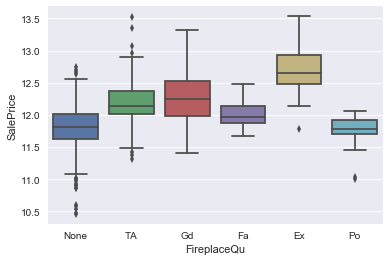

In [17]:
#Thus, I might need to reconsider the way I handle the variable FireplaceQC. It could seems like excellent conditions of fireplaces
#have a higher price.
sns.boxplot(x = 'FireplaceQu', y = 'SalePrice', data = df_all)

### CONVERT FIREPLACEQU SO IT KEEPS THE ORDER (0-5)

In [18]:
ff_dict = {"None": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
df_all["FireplaceQu"] = df_all["FireplaceQu"].map(ff_dict).astype(int)

### LotFrontage
- LotFrontage is skweded, which means that we need to transform the variable. Here, there is a lot of various options. In this case, I take the median due the fact that we have extremes values. Taking the median makes the distribution less sensitive to these extremes values compared with taking the mean for instance.
- Number of missing values: 486

In [19]:
df_all['LotFrontage'].isnull().sum()

486

#### Imputing missing values - LotFrontage
- Sqrt of area as imputing, we assume that the lot is "close" to be sqaure shaped

In [20]:
df_all.loc[df_all.LotFrontage.isnull(), 'LotFrontage'] = np.sqrt(df_all.loc[df_all.LotFrontage.isnull()].LotArea)
print(df_all['LotFrontage'].isnull().sum())

0


count    2919.000000
mean       75.373489
std        28.948335
min        21.000000
25%        60.000000
50%        72.000000
75%        89.050533
max       405.783193
Name: LotFrontage, dtype: float64


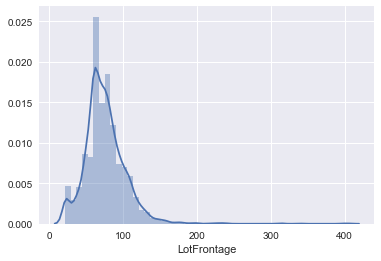

In [21]:
print(df_all['LotFrontage'].describe())
#Histogram
import seaborn as sns
sns.distplot(df_all['LotFrontage'])

### How is LotFrontage Versus SalePrice looking?

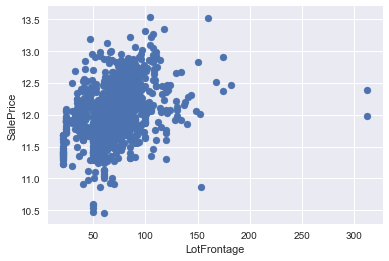

In [22]:
plt.scatter(x = 'LotFrontage', y = 'SalePrice', data = df_train)
plt.xlabel('LotFrontage')
plt.ylabel('SalePrice')

### Garage Quality, Garage Type, Garage Finish, Garage Cond
- Only five procent missing, and I consider to drop since GarageCars and GarageArea probably are better indicators
- Therefore, I replace NA with None

In [23]:
List_Garage = ['GarageType', 'GarageFinish', 'GarageCond', 'GarageQual']
df_all[List_Garage].isnull().sum()

GarageType      157
GarageFinish    159
GarageCond      159
GarageQual      159
dtype: int64

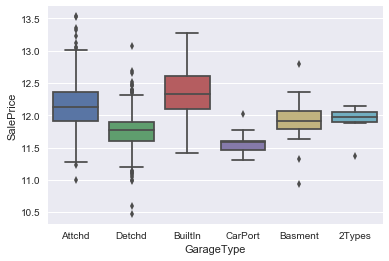

In [24]:
sns.boxplot(x = 'GarageType', y = 'SalePrice', data = df_all)

In [25]:
#Rplace missing values with None for Garage Quality, Garage Type, Garage Finish & Garage Condition
df_all[List_Garage] = df_all[List_Garage].fillna('None')

#confirm that 159 missing values were substitued with None
df_all[List_Garage].isnull().sum()

GarageType      0
GarageFinish    0
GarageCond      0
GarageQual      0
dtype: int64

In [26]:
## dubble checking, what NA was replace with None

In [27]:
df_all['GarageQual'] = df_all['GarageQual'].fillna('None')
#confirm that 159 missing values were substitued with None
df_all['GarageQual'].value_counts()

TA      2604
None     159
Fa       124
Gd        24
Po         5
Ex         3
Name: GarageQual, dtype: int64

### GarageYrBlt, Garage Area, Garage Cars
- Replace missing with 0.
- Seems like it is the same observations that are missing
- GarageQuality and GarageYrBlt, this is probably due to the fact that the variable GarageCars = 0 means no cars in such garage, and therefore GarageYrBlt and GarageQuality is not represented!

In [28]:
List_Garage1 = ['GarageYrBlt', 'GarageArea', 'GarageCars']
df_all[List_Garage1].isnull().sum()

GarageYrBlt    159
GarageArea       1
GarageCars       1
dtype: int64

In [29]:
df_all[List_Garage1] = df_all[List_Garage1].fillna(0)
#confirm that NA was replaced with zero
df_all[List_Garage1].isnull().sum()

GarageYrBlt    0
GarageArea     0
GarageCars     0
dtype: int64

### Creating a new variable GarageMissing, indicating that the property do NOT have a house

In [30]:
temp = pd.Series(df_all['GarageQual'].replace('None', 1).replace('[^None]', 0, regex=True))
df_all['GarageMissing'] = temp

### BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath, BsmtHalfBath
- All numeric values 
- Missing values means no basement
- replace with zero

In [31]:
List_Bsmt_numeric = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']
df_all[List_Bsmt_numeric].isnull().sum()
#Observe that we only have few missing values

BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
BsmtFullBath    2
BsmtHalfBath    2
dtype: int64

In [32]:
#Replace NA with zero
df_all[List_Bsmt_numeric] = df_all[List_Bsmt_numeric].fillna(0)
#confirm
df_all[List_Bsmt_numeric].isnull().sum()

BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
dtype: int64

### BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2
- Categorical variables
- NA means that there is NO basement
- Therefore replace NA with None

In [33]:
#Number of missing values for each category
List_Bsmt_categorical = ['BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1', 'BsmtFinType2']
df_all[List_Bsmt_categorical].isnull().sum()

BsmtQual        81
BsmtCond        82
BsmtExposure    82
BsmtFinType1    79
BsmtFinType2    80
dtype: int64

In [34]:
#Imputing missing values
df_all[List_Bsmt_categorical] = df_all[List_Bsmt_categorical].fillna('None')
#Confrim that NA was replaced
df_all[List_Bsmt_categorical].isnull().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64

## Creating a new variable BasementMissing, indicating that the property do NOT have an Basement

In [35]:
temp = pd.Series(df_all['BsmtQual'].replace('None', 1).replace('[^None]', 0, regex=True))
df_all['BasementMissing'] = temp

In [36]:
df_all['BasementMissing'].value_counts()

0    2838
1      81
Name: BasementMissing, dtype: int64

### MasVnrArea
- Numeric variable
- 0 indicate no sqaure meters of "murværk". Since MasVnrType Na means that the house has no "murværk"

In [37]:
#Number of missing
df_all['MasVnrArea'].isnull().sum()

23

In [38]:
df_all['MasVnrArea'] = df_all['MasVnrArea'].fillna(0)
#confirm that Na was replaced with 0
df_all['MasVnrArea'].isnull().sum()

0

### MasVnrType
- Categorical variable where NA means no "murværk"

In [39]:
df_all['MasVnrType'].isnull().sum()

24

In [40]:
df_all['MasVnrType'].value_counts()

None       1742
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

In [41]:
df_all['MasVnrType'] = df_all['MasVnrType'].fillna("None") 
#confirm that Na was replaced with 0
df_all['MasVnrType'].isnull().sum()

0

### MSZoning
- Only four missing observations.
- Observe that RL is significantly more represented that the 3 other MSZonings
- mode should be appropriate in this case. Mode replaces missing with the value that is represented most
- Recall that 0 is rowwise, while 1 is column

In [42]:
X = df_all['MSZoning'].value_counts()
(X)/(X).sum() * 100

RL         77.701544
RM         15.780446
FV          4.768439
RH          0.891938
C (all)     0.857633
Name: MSZoning, dtype: float64

In [43]:
print(df_all['MSZoning'].value_counts())
print(df_all['MSZoning'].isnull().sum())

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64
4


In [44]:
df_all['MSZoning'] = df_all['MSZoning'].fillna(df_all['MSZoning'].mode()[0])
#Confirm that the replacement occured succesfully.
print(df_all['MSZoning'].value_counts())
print(df_all['MSZoning'].isnull().sum())

RL         2269
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64
0


### Functional
- Categorical variable with 8 cateogories
- describtion: : Home functionality (Assume typical unless deductions are warranted)
- Taking the same approach as for MSzoning, type is clearly most represented!
- Mode replacement


In [45]:
print(df_all['Functional'].value_counts())
print(df_all['Functional'].isnull().sum())

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64
2


In [46]:
df_all['Functional'] = df_all['Functional'].fillna(df_all['Functional'].mode()[0])
#Confirm that the replacement occured succesfully.
print(df_all['Functional'].value_counts())
print(df_all['Functional'].isnull().sum())

Typ     2719
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64
0


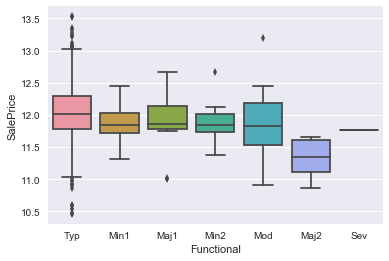

In [47]:
sns.boxplot(x = 'Functional', y = 'SalePrice', data = df_all)

### Utilities
- Categorical varible with four categories
- Type of utilities available
- Only 2 missing values
- Taking the same approach as for MSzoning, type is clearly most represented!
- Mode replacement

In [48]:
print(df_all['Utilities'].value_counts())
print(df_all['Utilities'].isnull().sum())

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64
2


In [49]:
df_all['Utilities'] = df_all['Utilities'].fillna(df_all['Utilities'].mode()[0])
#Confirm that the replacement occured succesfully.
print(df_all['Utilities'].value_counts())
print(df_all['Utilities'].isnull().sum())

AllPub    2918
NoSeWa       1
Name: Utilities, dtype: int64
0


### Exterior1st and Exterior2nd
- Exterior1st: Exterior covering on house
- Exteriors2nd: Exterior covering on house (if more than one material)
- Categorical variable with 17 categories
- Exterior1st, only ONE missing value
- Ezterior2nd, only ONE missing value
- Same argument as before, using MODE for replacement!


In [50]:
print(df_all['Exterior1st'].value_counts())
print(df_all['Exterior1st'].isnull().sum())

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
Stone         2
CBlock        2
AsphShn       2
ImStucc       1
Name: Exterior1st, dtype: int64
1


In [51]:
#mode replacement
df_all['Exterior1st'] = df_all['Exterior1st'].fillna(df_all['Exterior1st'].mode()[0])
df_all['Exterior2nd'] = df_all['Exterior2nd'].fillna(df_all['Exterior2nd'].mode()[0])

In [52]:
print(df_all['Exterior2nd'].value_counts())
print(df_all['Exterior2nd'].isnull().sum())

VinylSd    1015
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
Stucco       47
BrkFace      47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64
0


#### PUTTING THE LAST 5 LEVELS INTO ONE CALLED "OTHER" (reason is to bring down the number of dummy columns we create when do dummy encoding).

In [53]:
df_all.Exterior2nd.replace("Stone", "Other", inplace=True)
df_all.Exterior2nd.replace("AsphShn", "Other", inplace=True)
df_all.Exterior2nd.replace("CBlock", "Other", inplace=True)

### Kitchen Quality
- Categorical with 5 categories
- Only one missing value
- Mode replacement

In [54]:
print(df_all['KitchenQual'].value_counts())
print(df_all['KitchenQual'].isnull().sum())

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64
1


In [55]:
df_all['KitchenQual'] = df_all['KitchenQual'].fillna(df_all['KitchenQual'].mode()[0])

### SaleType
- Categorical with 10 categories
- Only one missing value
- Mode replacement again

In [56]:
print(df_all['SaleType'].value_counts())
print(df_all['SaleType'].isnull().sum())

WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64
1


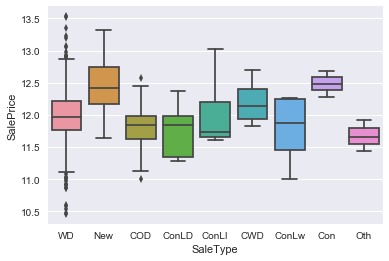

In [57]:
sns.boxplot(x = 'SaleType', y = 'SalePrice', data = df_all)

In [58]:
# We consider this as a paramount variable, so we will not aggregate or any other modifications...

In [59]:
# Mode Replacement
df_all['SaleType'] = df_all['SaleType'].fillna(df_all['SaleType'].mode()[0])

### Electrical
- Categorical with 5 categories
- Only one missing value
- Mode replacement

In [60]:
print(df_all['Electrical'].value_counts())
print(df_all['Electrical'].isnull().sum())

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64
1


In [61]:
df_all['Electrical'] = df_all['Electrical'].fillna(df_all['Electrical'].mode()[0])

## STATUS: NONE of the variables contain MISSING VALUES now

### NEXT:

### Why? Should we convert ordinal variables to numeric. The boxplots below examplies that it might be a good idea.

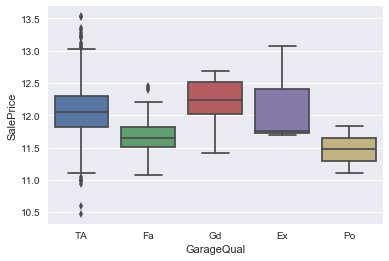

In [62]:
sns.boxplot(x = 'GarageQual', y = 'SalePrice', data = df_train)

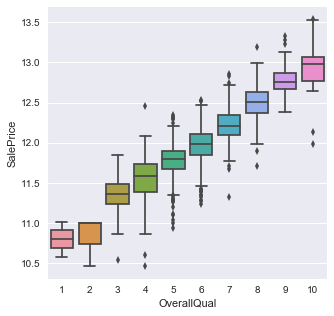

In [63]:
fig, ax = plt.subplots()
fig.set_size_inches(5.0, 5.0)
sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = df_train)

#### NEXT: Convert all ORDINAL CATEGORICAL VARIABLES to NUMERIC
#### Scale: 
- None: 0, Po:1, Fa: 2, TA: 3, Gd: 4, Ex: 5
#### Variables:
    - ExterQual
    - ExterCond
    - BsmtCond
    - HeatingQC
    - KitchenQual
    - FirePlaceQu
    - GarageQual
    - GarageCond
    - PoolQC

In [64]:
GarageType      0
GarageFinish    0
GarageCond      0
GarageQual

SyntaxError: invalid syntax (<ipython-input-64-75bc29376985>, line 1)

In [ ]:
qual_dict = {"None": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
df_all["ExterCond"] = df_all["ExterCond"].map(qual_dict).astype(int)
df_all["ExterQual"] = df_all["ExterQual"].map(qual_dict).astype(int)
df_all["BsmtQual"] = df_all["BsmtQual"].map(qual_dict).astype(int)
df_all["BsmtCond"] = df_all["BsmtCond"].map(qual_dict).astype(int)
df_all["HeatingQC"] = df_all["HeatingQC"].map(qual_dict).astype(int)
df_all["KitchenQual"] = df_all["KitchenQual"].map(qual_dict).astype(int)
df_all["GarageQual"] = df_all["GarageQual"].map(qual_dict).astype(int)
df_all["GarageCond"] = df_all["GarageCond"].map(qual_dict).astype(int)

### GarageFinish

In [ ]:
qual_dict_garage = {"None": 0, "Unf": 1, "RFn": 2, "Fin": 3}
df_all["GarageFinish"] = df_all["GarageFinish"].map(qual_dict_garage).astype(int)

### BsmtFinType1, BsmtFinType2
#### Scale:  
- None: 0, Unf: 1, LwQ: 2, Rec: 3, BLQ: 4, ALQ: 5, GLQ: 6
    #### Variables:
    - BsmtFinType1
    - BsmtFinType2
 

In [ ]:
bsmt_fin_dict = {"None": 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6}
df_all["BsmtFinType1"] = df_all["BsmtFinType1"].map(bsmt_fin_dict).astype(int)
df_all["BsmtFinType2"] = df_all["BsmtFinType2"].map(bsmt_fin_dict).astype(int)

### BsmtExposure
#### Scale:  
- "None": 0, "No": 1, "Mn": 2, "Av": 3, "Gd": 4
    #### Variables:
    - BsmtExposure

In [ ]:
df_all["BsmtExposure"] = df_all["BsmtExposure"].map({"None": 0, "No": 1, "Mn": 2, "Av": 3, "Gd": 4}).astype(int)

### Funcational

In [ ]:
df_all["Functional"] = df_all["Functional"].map({None: 0, "Sal": 1, "Sev": 2, "Maj2": 3, "Maj1": 4, "Mod": 5, "Min2": 6, "Min1": 7, "Typ": 8}).astype(int)

## Correlation -  Examining Correlation between predictor

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(10.0, 10.0)
corrmat = df_all.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
g = sns.heatmap(df_all[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## New Features

In [ ]:
# 1: Total square feet
df_all['TotLivArea'] = df_all.GrLivArea + df_all.TotBsmtSF 

# 2: # Total number of bathrooms
df_all['TotalBath'] = df_all['BsmtFullBath'] + (0.5 * df_all['BsmtHalfBath']) + df_all['FullBath'] + (0.5 * df_all['HalfBath'])

# 3: BsmtUnFinRatio
df_all['BsmtUnFinRatio'] = df_all.BsmtUnfSF / df_all.TotBsmtSF 

# 4: AreaPerCar
df_all['AreaPerCar'] = df_all.GarageArea / df_all.GarageCars 

# 5: AvgRoomSize 
df_all['AvgRoomSize'] = df_all.GrLivArea / df_all.TotRmsAbvGrd

# SHOULD WE KEEP INTERACTION TERMS, I.E. NOT EXLUDE THEM?
# 6: Condition should be reduced

In [65]:
df_all.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,GarageMissing,BasementMissing
0,856,854,1,0,3,1Fam,TA,No,706.0,0.0,...,Pave,8,856.0,AllPub,0,2003,2003,2008,0,0
1,1262,0,1,0,3,1Fam,TA,Gd,978.0,0.0,...,Pave,6,1262.0,AllPub,298,1976,1976,2007,0,0
2,920,866,1,0,3,1Fam,TA,Mn,486.0,0.0,...,Pave,6,920.0,AllPub,0,2001,2002,2008,0,0
3,961,756,1,0,3,1Fam,Gd,No,216.0,0.0,...,Pave,7,756.0,AllPub,0,1915,1970,2006,0,0
4,1145,1053,1,0,4,1Fam,TA,Av,655.0,0.0,...,Pave,9,1145.0,AllPub,192,2000,2000,2008,0,0


### TRANSFORMATION OF SKEWED VARIABLE

In [ ]:
# Log transform of the skewed numerical features to lessen impact of outliers
# Inspired by Alexandru Papiu's script : https://www.kaggle.com/apapiu/house-prices-advanced-regression-techniques/regularized-linear-models
# As a general rule of thumb, a skewness with an absolute value > 0.5 is considered at least moderately skewed
from scipy.stats import skew, kurtosis
from scipy.special import boxcox1p

numerical_features = ['1stFlrSF',
                      "2ndFlrSF",
                      "GrLivArea",
                      "LotArea",
                      "OpenPorchSF",
                      "WoodDeckSF"]

train_num = df_all[numerical_features]

skewness = train_num.apply(lambda x: skew(x) )
skewness = skewness[abs(skewness) > 0.2]
print(str(skewness.shape[0]) + " skewed numerical features to log transform")
skewed_features = skewness.index
print(skewness)

df_all[numerical_features] = np.log(df_all[numerical_features] + 1)

In [ ]:
df_all[numerical_features].skew()

## Outliars!

#### GrLivArea
- Observe a few outliers
- Remove observations with a GrLivArea above 4000

In [ ]:
plt.scatter(x = 'GrLivArea', y = 'SalePrice', data = df_train)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

#### Dropping GrLivArea > 4000

In [ ]:
##df_all.drop(df_all[df_all["GrLivArea"] > 4000].index, inplace=True)

##### Confirming that the observations was dropped

In [ ]:
plt.scatter(x = 'GrLivArea', y = 'SalePrice', data = df_all)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

In [ ]:
#Get the entire dataframe
pd.set_option('display.max_columns', 80)
df_all

# DROP THE FOLLOWING VARIABLES:
- UTILITIES: Because it's a constant
- POOLAREA

### Splitning the dataset back into training and validate

### Dummyfi variables

In [ ]:
dummy_df = pd.get_dummies(df_all)

In [ ]:
pd.set_option('display.max_columns', 80)
dummy_df

In [ ]:
df_clean_test=dummy_df[dummy_df.SalePrice.isnull()]
df_clean_train=dummy_df[dummy_df.SalePrice.notnull()]

In [ ]:
df_clean_test.shape

In [ ]:
#train
df_clean_train.to_csv('cleaned_train_dummy.csv')

In [ ]:
#test
df_clean_test.to_csv('cleaned_test_dummy.csv')

### Without dummifying data

In [ ]:
df_clean_test=df_all[df_all.SalePrice.isnull()]
df_clean_train=df_all[df_all.SalePrice.notnull()]

#### Saving the training and test set and excel.csv

In [ ]:
df_clean_test.to_csv('cleaned_test.csv')
df_clean_train.to_csv('cleaned_train.csv')